<a href="https://colab.research.google.com/github/datav1per/IBM-HR-ATRRITION/blob/main/IBM_HR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attrition = Employees leaving the company

Business knowledge tells us:

1. OverTime: Employees with frequent overtime may leave more.
2. DistanceFromHome: Longer distance reduce job satisfaction.
3. MonthlyIncome & JobLevel: Low salary  can cause dissatisfaction.
4. JobSatisfaction, EnvironmentSatisfaction, WorkLifeBalance: Direct indicators of how happy employees are.
5. Age & TotalWorkingYears: Younger employees often leave early; experienced employees may be more stable, those more aged may leave due retirement.
6. MaritalStatus: Single employees may be more mobile.
7. NumCompaniesWorked: Indicates job-changing tendencies.

In [ ]:
#importing all libraries which i used in this model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [ ]:
#loading dataset
data=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# EDA of Dataset


In [ ]:
#Basic EDA
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
pd.set_option('display.max_columns',None)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# EDA we found data has 35 columns, all has no null values, total 1470 entries.

### column of EmployeeCount, Over18, StandardHours, EmployeeNumber, can be dropped as all has same value which we saw from describe eda

In [ ]:
data.drop(['EmployeeCount','Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace= True)

In [ ]:
data.columns  #all the columns i have in datset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# all the columns with categorial dataset
categorical_cols = data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [ ]:
# all uniques values in categorial dataset
for cols in categorical_cols:
  print(cols,data[cols].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']


In [ ]:
#keeping a copy of data set
df=data.copy()

In [ ]:
# prompt: enocode object featues

label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])

In [ ]:
#checking label encoding
a=df.EducationField.unique()
display(pd.DataFrame(a, columns=['Education Field']))

,Education Field
0,1
1,4
2,3
3,2
4,5
5,0


In [ ]:
# one-hot encoding for multiclass columns
# df = pd.get_dummies(df, columns=['Department', 'BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

# target variable is attrition, and others are feature. Now moving on to get which feature is more correlated.

# working on the data distribution in the dataset

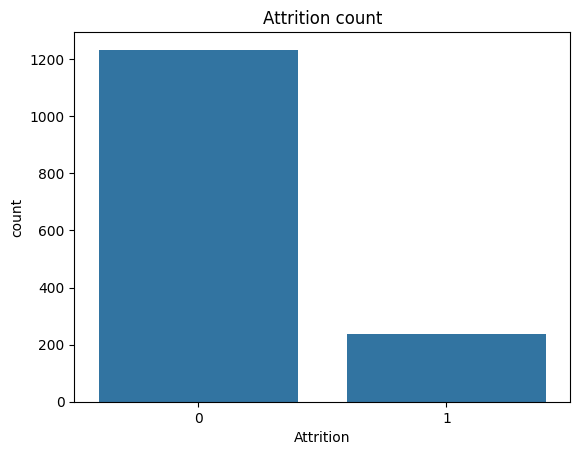

,count
Attrition,
0,1233
1,237


In [ ]:
sns.countplot(x='Attrition',data=df)
plt.title("Attrition count")
plt.show()
b=df["Attrition"].value_counts()
b

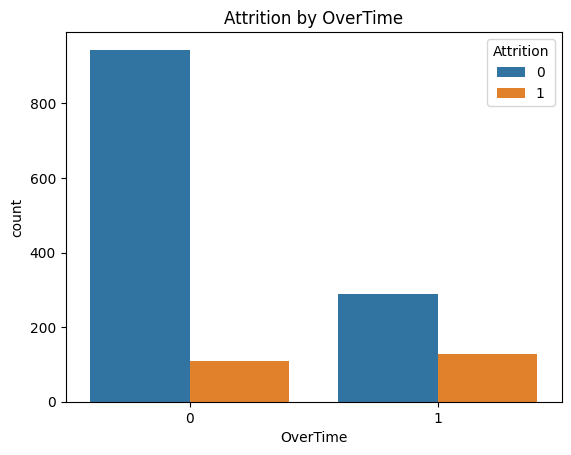

In [ ]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.show()

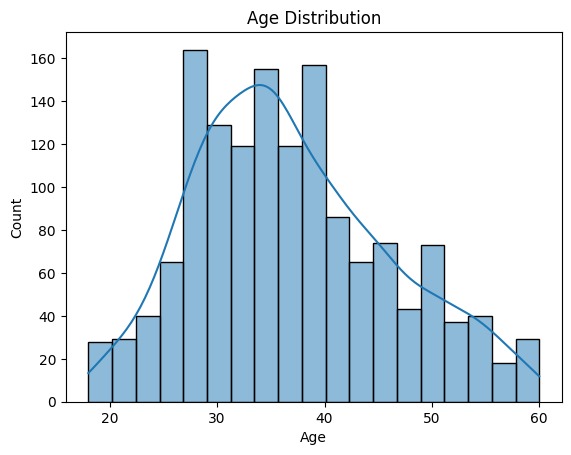

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


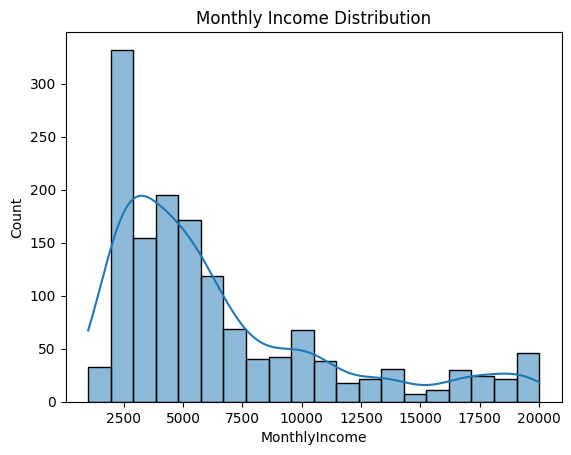

In [ ]:
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title('Monthly Income Distribution')
plt.show()


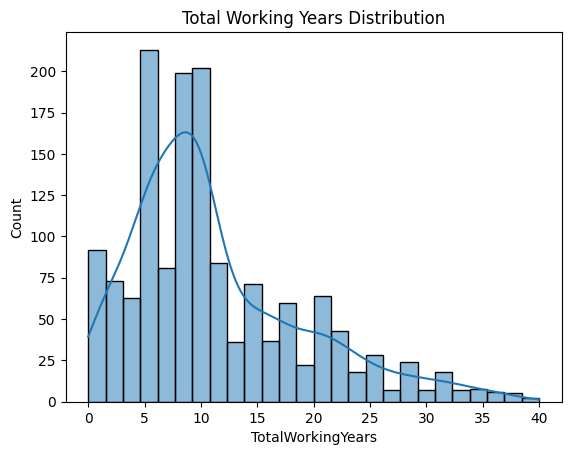

In [ ]:
sns.histplot(df['TotalWorkingYears'], kde=True)
plt.title('Total Working Years Distribution')
plt.show()


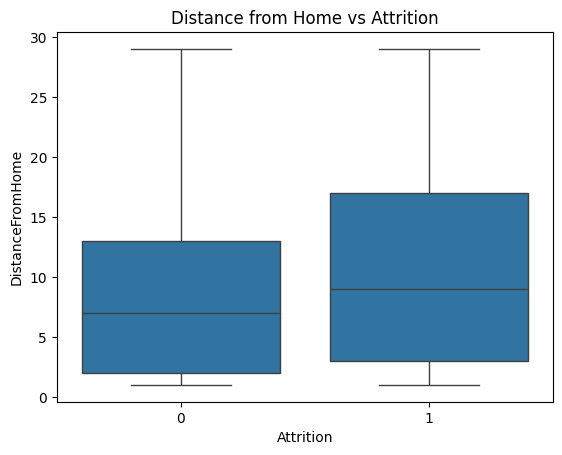

In [ ]:

sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Distance from Home vs Attrition')
plt.show()


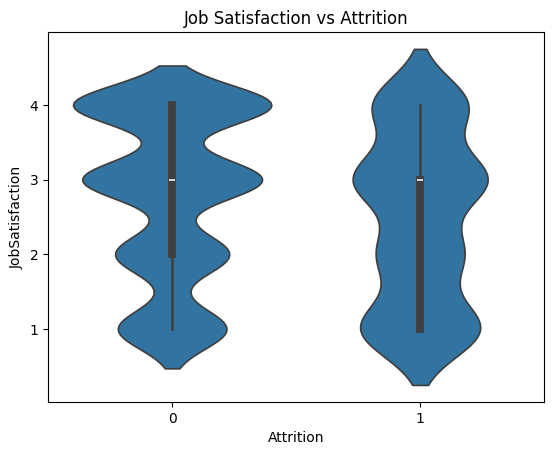

In [ ]:
sns.violinplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()


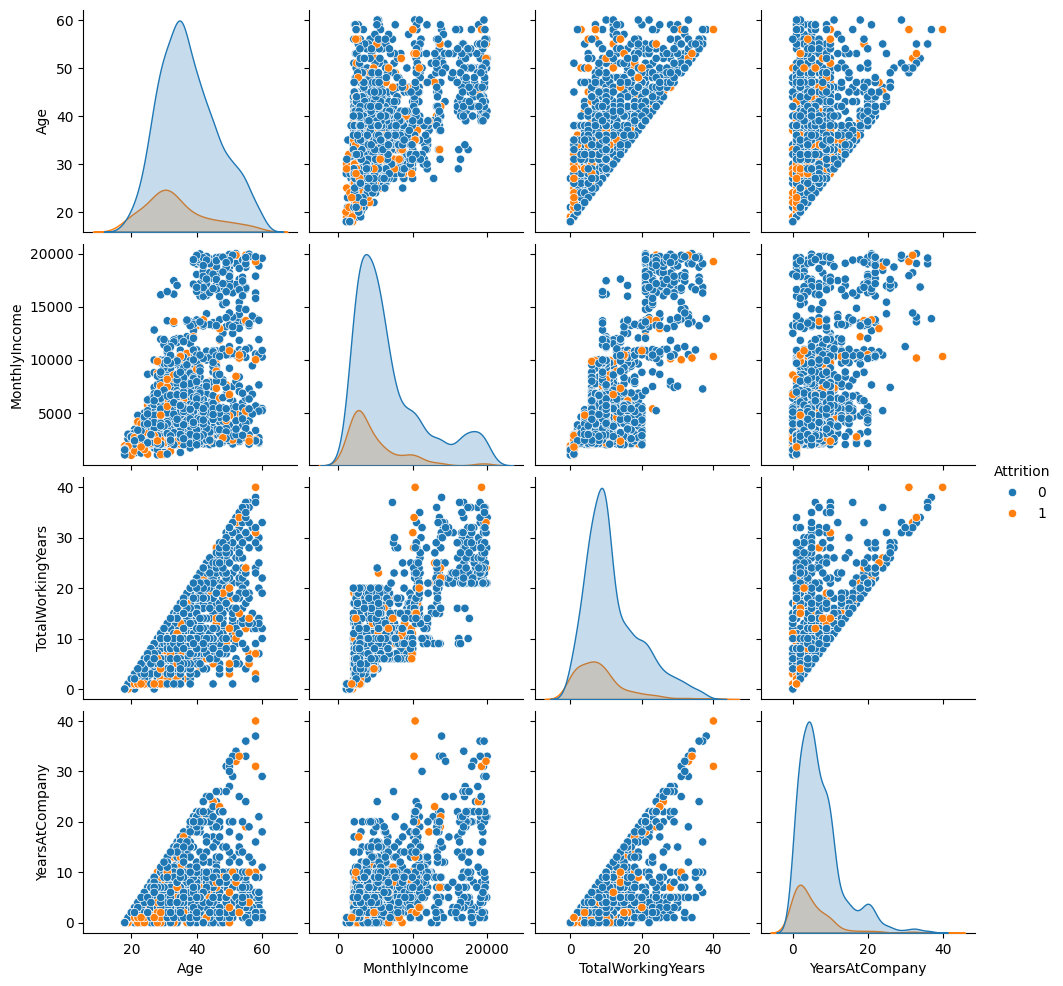

In [ ]:
import seaborn as sns

sns.pairplot(df, vars=['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany'],
             hue='Attrition')
plt.show()


# Feature selection

In [ ]:
# df = df.drop('OverTime_labels', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [ ]:
corr=df.corr()
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [ ]:
corr['Attrition'].sort_values(ascending=False)


,Attrition
Attrition,1.000000
OverTime,0.246118
MaritalStatus,0.162070
DistanceFromHome,0.077924
JobRole,0.067151
Department,0.063991
NumCompaniesWorked,0.043494
Gender,0.029453
EducationField,0.026846
MonthlyRate,0.015170


In [ ]:
# SelectKBest - Top 10 features

X = df.drop('Attrition', axis=1)
y = df['Attrition']

# For chi2, data must be non-negative
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X, y)

# Show top features
selected_features = selector.get_support(indices=True)
print(X.columns[selected_features])


Index(['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#RFECV
model = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print(X.columns[rfecv.support_])


Optimal number of features: 27
Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


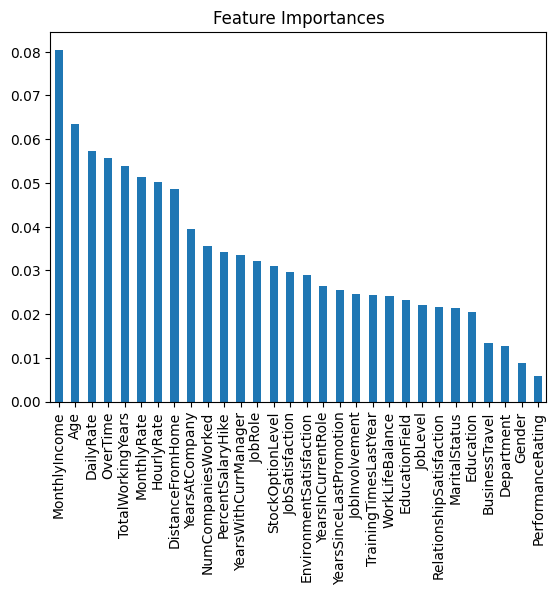

In [ ]:
#Random Forest Fatures

model.fit(X, y)
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()


#Modelling
we will make model as:
1. Logistic Regression - SelectKbest
2. Random forest - RFECV and SelectKBest
3.  Decision Trees- SelectKBest and RFECV
4. Gradient Boosting -RFECV

In [ ]:
# Listing of features selected for modelling
select_kbest_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
                         'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                         'YearsWithCurrManager']

rfecv_features = ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
                  'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
                  'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                  'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                  'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
                  'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']

target = 'Attrition'



In [ ]:
kbes = df[select_kbest_features]
rfe= df[rfecv_features]
y= df[target]

In [ ]:
Xk_train, Xk_test, yk_train, yk_test = train_test_split(kbes, y, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(rfe, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
Xk_train_scaled = scaler.fit_transform(Xk_train)
Xk_test_scaled = scaler.transform(Xk_test)

Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)


In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n----- {name} -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



In [ ]:
# Logistic Regression (SelectKBest)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(Xk_train_scaled, yk_train)
evaluate_model('Logistic Regression (SelectKBest)', lr, Xk_test_scaled, yk_test)


----- Logistic Regression (SelectKBest) -----
Accuracy: 0.8741496598639455
Confusion Matrix:
 [[254   1]
 [ 36   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [ ]:
# Random Forest (SelectKBest)
rf_k = RandomForestClassifier(random_state=42)
rf_k.fit(Xk_train, yk_train)
evaluate_model('Random Forest (SelectKBest)', rf_k, Xk_test, yk_test)


----- Random Forest (SelectKBest) -----
Accuracy: 0.8367346938775511
Confusion Matrix:
 [[243  12]
 [ 36   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       255
           1       0.20      0.08      0.11        39

    accuracy                           0.84       294
   macro avg       0.54      0.51      0.51       294
weighted avg       0.78      0.84      0.80       294



In [ ]:
# Random Forest (RFECV)
rf_r = RandomForestClassifier(random_state=42)
rf_r.fit(Xr_train, yr_train)
evaluate_model('Random Forest (RFECV)', rf_r, Xr_test, yr_test)


----- Random Forest (RFECV) -----
Accuracy: 0.8775510204081632
Confusion Matrix:
 [[254   1]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [ ]:
#Decision Tree (SelectKBest)
dt_k = DecisionTreeClassifier(random_state=42)
dt_k.fit(Xk_train, yk_train)
evaluate_model('Decision Tree (SelectKBest)', dt_k, Xk_test, yk_test)


----- Decision Tree (SelectKBest) -----
Accuracy: 0.7925170068027211
Confusion Matrix:
 [[227  28]
 [ 33   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       255
           1       0.18      0.15      0.16        39

    accuracy                           0.79       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.79      0.79       294



In [ ]:
# Decision Tree (RFECV)
dt_r = DecisionTreeClassifier(random_state=42)
dt_r.fit(Xr_train, yr_train)
evaluate_model('Decision Tree (RFECV)', dt_r, Xr_test, yr_test)


----- Decision Tree (RFECV) -----
Accuracy: 0.7721088435374149
Confusion Matrix:
 [[219  36]
 [ 31   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.18      0.21      0.19        39

    accuracy                           0.77       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.77      0.78       294



In [ ]:
# Gradient Boosting (RFECV)
gb_r = GradientBoostingClassifier(random_state=42)
gb_r.fit(Xr_train_scaled, yr_train)
evaluate_model('Gradient Boosting (RFECV)', gb_r, Xr_test_scaled, yr_test)


----- Gradient Boosting (RFECV) -----
Accuracy: 0.8775510204081632
Confusion Matrix:
 [[247   8]
 [ 28  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.58      0.28      0.38        39

    accuracy                           0.88       294
   macro avg       0.74      0.63      0.66       294
weighted avg       0.86      0.88      0.86       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


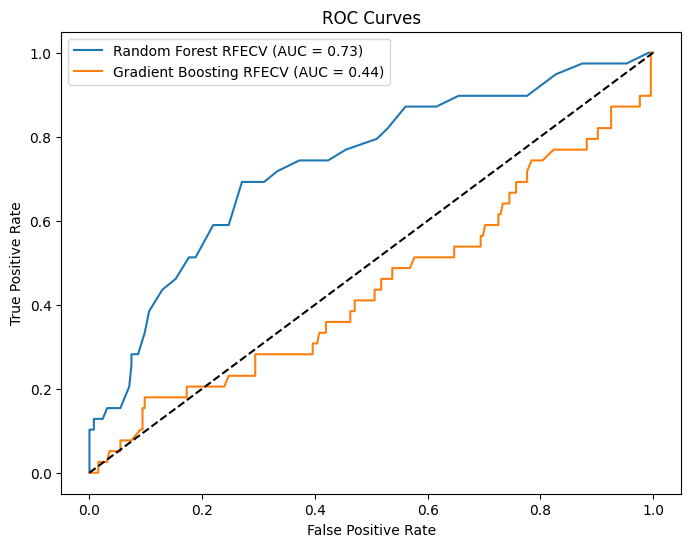

In [ ]:
def plot_roc(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

plt.figure(figsize=(8,6))
plot_roc(rf_r, Xr_test, yr_test, 'Random Forest RFECV')
plot_roc(gb_r, Xr_test, yr_test, 'Gradient Boosting RFECV')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# Power Bi dashboard
making files to upload in power Bi for dashboards


In [ ]:
# Create DataFrame with updated results
model_perf = pd.DataFrame({
    'Model': [
        'Logistic Regression (SelectKBest)',
        'Decision Tree (SelectKBest)',
        'Decision Tree (RFECV)',
        'Random Forest (SelectKBest)',
        'Random Forest (RFECV)',
        'Gradient Boosting (RFECV)'
    ],
    'Accuracy': [
        0.8741, 0.7925, 0.7721, 0.8367, 0.8776, 0.8776
    ],
    'Precision': [
        0.75, 0.18, 0.18, 0.20, 0.80, 0.58
    ],
    'Recall': [
        0.08, 0.15, 0.21, 0.08, 0.10, 0.28
    ],
    'F1 Score': [
        0.14, 0.16, 0.19, 0.11, 0.18, 0.38
    ]
})

# Round numerical columns to 3 decimals for neatness
model_perf = model_perf.round(3)

# Display table
print(model_perf)

# Save to CSV for Power BI import
model_perf.to_csv('/content/model_summary.csv', index=False)


                               Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression (SelectKBest)     0.874       0.75    0.08      0.14
1        Decision Tree (SelectKBest)     0.792       0.18    0.15      0.16
2              Decision Tree (RFECV)     0.772       0.18    0.21      0.19
3        Random Forest (SelectKBest)     0.837       0.20    0.08      0.11
4              Random Forest (RFECV)     0.878       0.80    0.10      0.18
5          Gradient Boosting (RFECV)     0.878       0.58    0.28      0.38


In [ ]:
# Predict attrition probabilities using the best model (e.g. Gradient Boosting RFECV)
probabilities = gb_r.predict_proba(Xr_test_scaled)[:,1]

risk_df = pd.DataFrame({
    'EmployeeIndex': Xr_test.index,  # Adjust if EmployeeNumber exists in your data
    'Attrition_Probability': probabilities
})

# Sort descending to find top risk employees
risk_df = risk_df.sort_values(by='Attrition_Probability', ascending=False)

# Top 10 employees at highest attrition risk
top10_risk = risk_df.head(10)
print(top10_risk)

# Save full risk scores and top10 separately
risk_df.to_csv('/content/all_employee_risks.csv', index=False)
top10_risk.to_csv('/content/top10_risk_new.csv', index=False)


     EmployeeIndex  Attrition_Probability
61             777               0.886154
49             892               0.827059
2             1222               0.821419
131           1311               0.805140
5              494               0.726986
137            439               0.689326
110           1167               0.683324
64             744               0.679895
125            422               0.674115
46             946               0.654645


#Conclusion:
Models achieved high accuracy by predicting the majority class (no attrition),but recall for attrition cases was low across most models.

## Gradient Boosting performed best (Recall: 28%, F1: 0.38).


